In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


In [3]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79
1273,2,"((-182, -6), (0, 0), (182, -12), (363, -21), (...","(690, 481)",-12,-21,-5
1274,2,"((-181, -1), (0, 0), (181, -2), (362, 0), (542...","(693, 481)",-2,0,17
1275,2,"((-180, -18), (0, 0), (181, 2), (363, 0), (545...","(695, 483)",2,0,1


In [4]:
df

,sequence,tail_coords,head,ant,pen,ult
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0
...,...,...,...,...,...,...
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63
4183,849,"((-181, 28), (0, 0), (182, -2), (364, 3), (546...","(454, 547)",-2,3,-3


In [5]:
df

,sequence,tail_coords,head,ant,pen,ult
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0
...,...,...,...,...,...,...
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63
4183,849,"((-181, 28), (0, 0), (182, -2), (364, 3), (546...","(454, 547)",-2,3,-3


In [6]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()
for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        df.loc[i, "cycle"] = cycle_number
        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            
    
    
    
    

2
Int64Index([1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275], dtype='int64')
13
Int64Index([1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316,
            1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325],
           dtype='int64')
48
Int64Index([1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385], dtype='int64')
49
Int64Index([1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397,
            1398, 1399, 1400, 1401, 1402, 1403, 1404],
           dtype='int64')
70
Int64Index([1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457,
            1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
            1469],
           dtype='int64')
79
Int64Index([1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505,
            1506, 1507, 1508, 1509],
           dtype='int64')
101
Int64Index([1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564,
            1565, 1566],
           dtype='int6

In [7]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18,1.0
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79,2.0
1273,2,"((-182, -6), (0, 0), (182, -12), (363, -21), (...","(690, 481)",-12,-21,-5,2.0
1274,2,"((-181, -1), (0, 0), (181, -2), (362, 0), (542...","(693, 481)",-2,0,17,2.0
1275,2,"((-180, -18), (0, 0), (181, 2), (363, 0), (545...","(695, 483)",2,0,1,2.0


In [8]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [9]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18,1.0,18.0,18.0
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79,2.0,NaN,NaN
1273,2,"((-182, -6), (0, 0), (182, -12), (363, -21), (...","(690, 481)",-12,-21,-5,2.0,-84.0,84.0
1274,2,"((-181, -1), (0, 0), (181, -2), (362, 0), (542...","(693, 481)",-2,0,17,2.0,22.0,22.0
1275,2,"((-180, -18), (0, 0), (181, 2), (363, 0), (545...","(695, 483)",2,0,1,2.0,-16.0,16.0


In [10]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.median())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]

temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)
df.head(30)


c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\numpy\lib

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18,1.0,18.0,18.0,26.0
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79,2.0,NaN,NaN,22.0
1273,2,"((-182, -6), (0, 0), (182, -12), (363, -21), (...","(690, 481)",-12,-21,-5,2.0,-84.0,84.0,22.0
1274,2,"((-181, -1), (0, 0), (181, -2), (362, 0), (542...","(693, 481)",-2,0,17,2.0,22.0,22.0,22.0
1275,2,"((-180, -18), (0, 0), (181, 2), (363, 0), (545...","(695, 483)",2,0,1,2.0,-16.0,16.0,22.0


In [11]:

import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN

print(the_firsts)

for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 2]
    last_com = the_lasts.iloc[i, 2]
    the_firsts.iloc[i, 10] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})        
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)

    
    
    



<ipython-input-11-dc0c703f327e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN


      sequence                                        tail_coords        head  \
1266         2  ((-181, -19), (0, 0), (182, 2), (363, 20), (53...  (670, 475)   
1272         2  ((-180, -19), (0, 0), (182, 2), (363, 20), (53...  (688, 480)   
1306        13  ((-177, 36), (0, 0), (182, 0), (364, 4), (545,...  (764, 564)   
1312        13  ((-178, 32), (0, 0), (181, -4), (363, 2), (545...  (774, 590)   
1318        13  ((-178, 30), (0, 0), (182, -9), (363, -15), (5...  (779, 610)   
...        ...                                                ...         ...   
4159       847  ((-182, 3), (0, 0), (182, 7), (364, 0), (540, ...  (553, 520)   
4165       847  ((-181, 12), (0, 0), (181, -5), (363, -16), (5...  (527, 536)   
4172       849  ((-181, -5), (0, 0), (182, 19), (364, 3), (522...  (500, 544)   
4178       849  ((-182, -2), (0, 0), (182, -5), (364, -13), (5...  (478, 545)   
4184       849  ((-181, 9), (0, 0), (182, -12), (365, -4), (53...  (449, 548)   

      ant  pen  ult  cycle 

c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
df


,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0,15.811388
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0,15.811388
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0,15.811388
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0,15.811388
...,...,...,...,...,...,...,...,...,...,...,...
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0,2.0,123.0,123.0,89.0,24.083189
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26,2.0,26.0,26.0,89.0,24.083189
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63,2.0,-89.0,89.0,89.0,24.083189
4183,849,"((-181, 28), (0, 0), (182, -2), (364, 3), (546...","(454, 547)",-2,3,-3,2.0,60.0,60.0,89.0,24.083189


In [13]:
df

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0,15.811388
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0,15.811388
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0,15.811388
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0,15.811388
...,...,...,...,...,...,...,...,...,...,...,...
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0,2.0,123.0,123.0,89.0,24.083189
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26,2.0,26.0,26.0,89.0,24.083189
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63,2.0,-89.0,89.0,89.0,24.083189
4183,849,"((-181, 28), (0, 0), (182, -2), (364, 3), (546...","(454, 547)",-2,3,-3,2.0,60.0,60.0,89.0,24.083189


In [14]:
#df=df.loc[df["speed_cycle"] < 130]


In [15]:
temp_max = df.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)


temp_min = df.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df["ult_min"] = df["ult_min"].apply(lambda x: abs(x))



In [16]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388,78,24
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0,15.811388,78,24
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0,15.811388,78,24
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0,15.811388,78,24
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0,15.811388,78,24
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18,1.0,18.0,18.0,26.0,15.811388,78,24
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79,2.0,NaN,NaN,22.0,7.615773,79,5
1273,2,"((-182, -6), (0, 0), (182, -12), (363, -21), (...","(690, 481)",-12,-21,-5,2.0,-84.0,84.0,22.0,7.615773,79,5
1274,2,"((-181, -1), (0, 0), (181, -2), (362, 0), (542...","(693, 481)",-2,0,17,2.0,22.0,22.0,22.0,7.615773,79,5
1275,2,"((-180, -18), (0, 0), (181, 2), (363, 0), (545...","(695, 483)",2,0,1,2.0,-16.0,16.0,22.0,7.615773,79,5


In [17]:
df["amplitude_cycle"] = df[["ult_max", "ult_min"]].max(axis=1)



In [18]:
df

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388,78,24,78
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0,15.811388,78,24,78
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0,15.811388,78,24,78
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0,15.811388,78,24,78
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0,15.811388,78,24,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0,2.0,123.0,123.0,89.0,24.083189,26,123,123
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26,2.0,26.0,26.0,89.0,24.083189,26,123,123
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63,2.0,-89.0,89.0,89.0,24.083189,26,123,123
4183,849,"((-181, 28), (0, 0), (182, -2), (364, 3), (546...","(454, 547)",-2,3,-3,2.0,60.0,60.0,89.0,24.083189,26,123,123


In [19]:
df=df.loc[df["speed_cycle"] < 110]
df=df.loc[df["distance_cycle"] < 38]
df=df.loc[df["amplitude_cycle"] < 160]

In [20]:
df["freq"] = df["speed_cycle"]/(df["amplitude_cycle"]*4)


df=df.loc[(df["freq"] < 0.24 )]



df["wave_length"] = df["speed_cycle"]/df["freq"]

In [21]:
df["freq*ampli"] = df["amplitude_cycle"]*df["freq"]

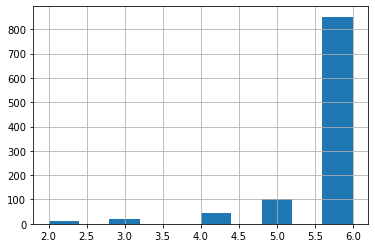

In [22]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)


df["c_counts"].hist(bins=10)

df = df.loc[df["c_counts"] > 4]

In [23]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [24]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1267,2,"((-182, -4), (0, 0), (182, -8), (364, 0), (536...","(673, 475)",-8,0,52,1.0,-26.0,26.0,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1268,2,"((-180, 11), (0, 0), (181, -16), (361, -19), (...","(676, 476)",-16,-19,6,1.0,-46.0,46.0,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1269,2,"((-181, -4), (0, 0), (181, -8), (361, -19), (5...","(679, 477)",-8,-19,-24,1.0,-30.0,30.0,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1270,2,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(682, 478)",0,0,0,1.0,24.0,24.0,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1271,2,"((-182, -1), (0, 0), (182, -2), (365, 0), (544...","(685, 480)",-2,0,18,1.0,18.0,18.0,26.0,15.811388,78,24,78,0.083333,312.0,6.50,6,2.635231
1306,13,"((-177, 36), (0, 0), (182, 0), (364, 4), (545,...","(764, 564)",0,4,-19,1.0,NaN,NaN,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1307,13,"((-177, 30), (0, 0), (181, -12), (362, -16), (...","(767, 568)",-12,-16,-21,1.0,-2.0,2.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1308,13,"((-180, 11), (0, 0), (181, -12), (362, -16), (...","(769, 573)",-12,-16,-3,1.0,18.0,18.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1309,13,"((-176, 33), (0, 0), (182, -8), (358, -35), (5...","(771, 578)",-8,-35,-113,1.0,-110.0,110.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621


In [25]:
df.loc[df["sequence"] == 110]


,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed
1592,110,"((-181, -3), (0, 0), (181, -6), (364, 0), (542...","(641, 576)",-6,0,38,1.0,NaN,NaN,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1593,110,"((-179, 24), (0, 0), (182, -2), (363, -2), (54...","(638, 580)",-2,-2,-17,1.0,-55.0,55.0,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1594,110,"((-181, 12), (0, 0), (181, 0), (362, 20), (537...","(635, 584)",0,20,69,1.0,86.0,86.0,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1595,110,"((-181, -6), (0, 0), (181, -12), (364, -2), (5...","(633, 588)",-12,-2,60,1.0,-9.0,9.0,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1596,110,"((-181, -17), (0, 0), (181, -8), (362, -25), (...","(631, 592)",-8,-25,-30,1.0,-90.0,90.0,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1597,110,"((-181, 1), (0, 0), (181, 3), (363, -13), (535...","(628, 595)",3,-13,-71,1.0,-41.0,41.0,55.0,23.021729,69,71,71,0.193662,284.0,13.75,6,3.836955
1598,110,"((-178, 33), (0, 0), (181, -4), (360, -22), (5...","(625, 598)",-4,-22,-91,2.0,NaN,NaN,108.0,19.849433,53,134,134,0.201493,536.0,27.00,6,3.308239
1599,110,"((-181, 14), (0, 0), (181, 5), (362, 20), (543...","(622, 601)",5,20,34,2.0,125.0,125.0,108.0,19.849433,53,134,134,0.201493,536.0,27.00,6,3.308239
1600,110,"((-181, -10), (0, 0), (181, 0), (362, 10), (53...","(621, 605)",0,10,53,2.0,19.0,19.0,108.0,19.849433,53,134,134,0.201493,536.0,27.00,6,3.308239
1601,110,"((-181, 4), (0, 0), (181, -15), (359, -38), (5...","(618, 607)",-15,-38,-67,2.0,-120.0,120.0,108.0,19.849433,53,134,134,0.201493,536.0,27.00,6,3.308239


In [26]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.head(1)
to_graphs

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388,78,24,78,0.083333,312.0,6.500,6,2.635231
1306,13,"((-177, 36), (0, 0), (182, 0), (364, 4), (545,...","(764, 564)",0,4,-19,1.0,NaN,NaN,18.0,23.769729,-3,113,113,0.039823,452.0,4.500,6,3.961621
1312,13,"((-178, 32), (0, 0), (181, -4), (363, 2), (545...","(774, 590)",-4,2,-1,2.0,NaN,NaN,1.0,17.464249,-1,56,56,0.004464,224.0,0.250,6,2.910708
1318,13,"((-178, 30), (0, 0), (182, -9), (363, -15), (5...","(779, 610)",-9,-15,-38,3.0,NaN,NaN,55.0,17.029386,17,118,118,0.116525,472.0,13.750,6,2.838231
1375,48,"((-176, 29), (0, 0), (182, -23), (361, -30), (...","(735, 713)",-23,-30,-13,1.0,NaN,NaN,53.0,17.691806,53,79,79,0.167722,316.0,13.250,6,2.948634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,847,"((-181, -4), (0, 0), (181, -8), (360, -26), (5...","(588, 499)",-8,-26,-51,2.0,NaN,NaN,57.0,34.669872,35,108,108,0.131944,432.0,14.250,6,5.778312
4159,847,"((-182, 3), (0, 0), (182, 7), (364, 0), (540, ...","(553, 520)",7,0,-43,3.0,NaN,NaN,60.0,26.076810,81,43,81,0.185185,324.0,15.000,6,4.346135
4165,847,"((-181, 12), (0, 0), (181, -5), (363, -16), (5...","(527, 536)",-5,-16,-47,4.0,NaN,NaN,14.5,16.643317,2,47,47,0.077128,188.0,3.625,5,3.328663
4172,849,"((-181, -5), (0, 0), (182, 19), (364, 3), (522...","(500, 544)",19,3,-77,1.0,NaN,NaN,20.0,17.000000,27,77,77,0.064935,308.0,5.000,6,2.833333


Decimal Representation p: 0.000000001525483430938669842251
Decimal Representation r: 0.452261035430928548528584087762


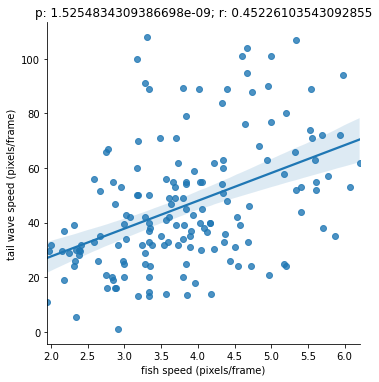

In [27]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=to_graphs, x="fish_speed", y="speed_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(to_graphs["fish_speed"], to_graphs["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

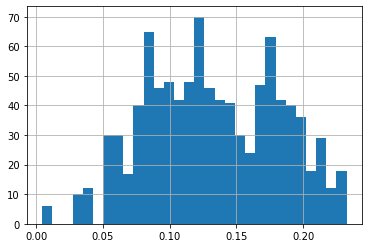

In [28]:
df["freq"].hist(bins=30)





<AxesSubplot:>

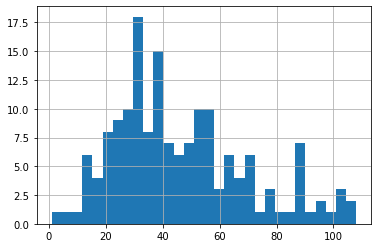

In [29]:

to_graphs["speed_cycle"].hist(bins=30)



0.9943675168687132
Decimal Representation of p: 0.994367516868713163802340204711
Decimal Representation of r: -0.000558961635259391277641416451


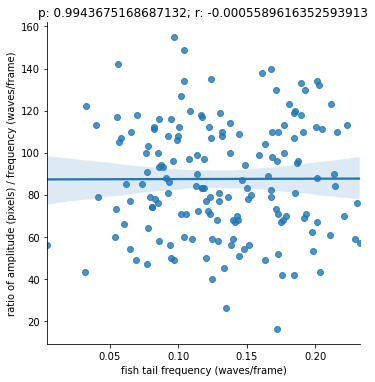

In [30]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=to_graphs, x="freq", y="amplitude_cycle")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["amplitude_cycle"])
ax.set(xlabel='fish tail frequency (waves/frame)', ylabel='ratio of amplitude (pixels) / frequency (waves/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

0.0003813709646841224
Decimal Representation of p: 0.000381370964684122422568013366
Decimal Representation of r: 0.275823933754273942220436310890


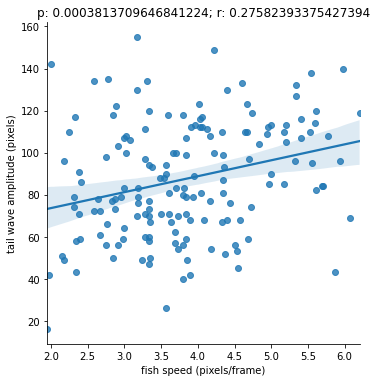

In [31]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=to_graphs, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(to_graphs["fish_speed"], to_graphs["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [32]:
df=df.loc[df["amplitude_cycle"] > 80]
#to_graphs.amplitude_cycle.hist(bins=30) 
df   

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,fish_speed
1306,13,"((-177, 36), (0, 0), (182, 0), (364, 4), (545,...","(764, 564)",0,4,-19,1.0,NaN,NaN,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1307,13,"((-177, 30), (0, 0), (181, -12), (362, -16), (...","(767, 568)",-12,-16,-21,1.0,-2.0,2.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1308,13,"((-180, 11), (0, 0), (181, -12), (362, -16), (...","(769, 573)",-12,-16,-3,1.0,18.0,18.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1309,13,"((-176, 33), (0, 0), (182, -8), (358, -35), (5...","(771, 578)",-8,-35,-113,1.0,-110.0,110.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
1310,13,"((-181, 2), (0, 0), (181, 5), (362, 0), (540, ...","(772, 582)",5,0,-36,1.0,77.0,77.0,18.0,23.769729,-3,113,113,0.039823,452.0,4.50,6,3.961621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,849,"((-179, 29), (0, 0), (182, -5), (361, -36), (5...","(473, 545)",-5,-36,-123,2.0,-104.0,104.0,89.0,24.083189,26,123,123,0.180894,492.0,22.25,6,4.013865
4180,849,"((-181, 0), (0, 0), (181, 0), (363, 0), (545, 0))","(468, 545)",0,0,0,2.0,123.0,123.0,89.0,24.083189,26,123,123,0.180894,492.0,22.25,6,4.013865
4181,849,"((-182, -2), (0, 0), (182, -4), (364, 0), (543...","(464, 546)",-4,0,26,2.0,26.0,26.0,89.0,24.083189,26,123,123,0.180894,492.0,22.25,6,4.013865
4182,849,"((-182, 14), (0, 0), (182, -3), (363, -18), (5...","(459, 546)",-3,-18,-63,2.0,-89.0,89.0,89.0,24.083189,26,123,123,0.180894,492.0,22.25,6,4.013865


1.1254406763904026e-18
Decimal Representation of p: 0.000000000000000001125440676390
Decimal Representation of r: 0.368743558341573574033134264027


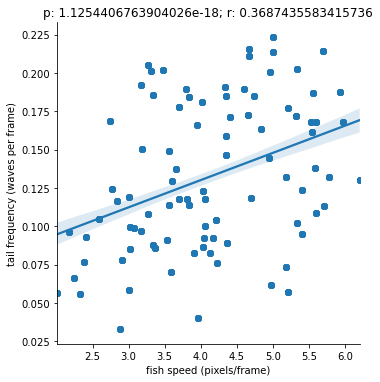

In [33]:
#df=df.loc[df["amp/freq"] < 1]


from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(df["fish_speed"], df["freq"])

ax = sns.lmplot(data=df, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

<AxesSubplot:>

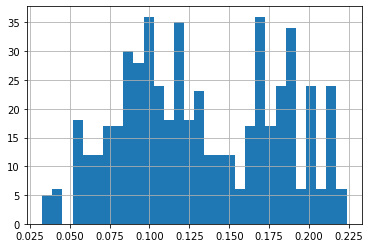

In [34]:
df["freq"].hist(bins=30)

<AxesSubplot:>

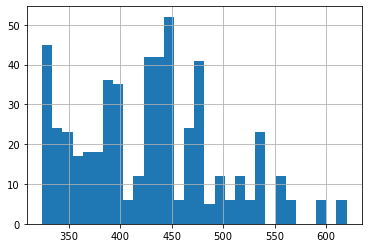

In [35]:
#df=df.loc[df["wave_length"] < 42]

df["wave_length"].hist(bins=30)



0.7090176345827757
Decimal Representation of p: 0.709017634582775668761200904555
Decimal Representation of r: 0.016170562532394416183079144389


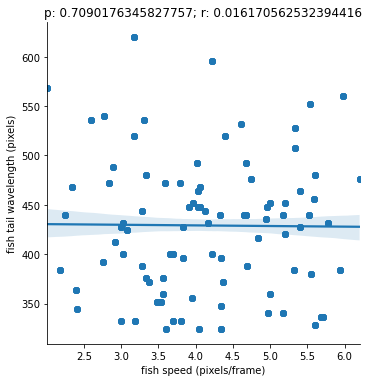

In [36]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(df["fish_speed"], df["wave_length"])
ax = sns.lmplot(data=df, x="fish_speed", y="wave_length").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish tail wavelength (pixels)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [37]:

#df["distance_cycle"].hist(bins=10)

5.28902288408511e-18
Decimal Representation of p: 0.000000000000000005289022884085
Decimal Representation of r: 0.361938238181734428522418056673


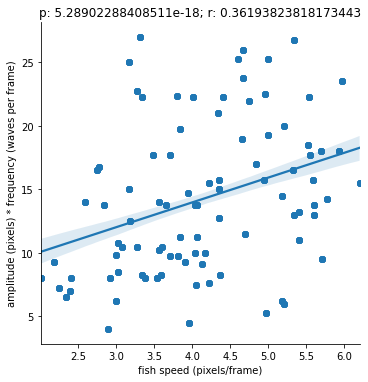

In [38]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(df["fish_speed"], df["freq*ampli"])

ax = sns.lmplot(data=df, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [39]:
the_firsts

,sequence,tail_coords,head,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
1266,2,"((-181, -19), (0, 0), (182, 2), (363, 20), (53...","(670, 475)",2,20,78,1.0,NaN,NaN,26.0,15.811388
1272,2,"((-180, -19), (0, 0), (182, 2), (363, 20), (53...","(688, 480)",2,20,79,2.0,NaN,NaN,22.0,7.615773
1306,13,"((-177, 36), (0, 0), (182, 0), (364, 4), (545,...","(764, 564)",0,4,-19,1.0,NaN,NaN,18.0,23.769729
1312,13,"((-178, 32), (0, 0), (181, -4), (363, 2), (545...","(774, 590)",-4,2,-1,2.0,NaN,NaN,1.0,17.464249
1318,13,"((-178, 30), (0, 0), (182, -9), (363, -15), (5...","(779, 610)",-9,-15,-38,3.0,NaN,NaN,55.0,17.029386
...,...,...,...,...,...,...,...,...,...,...,...
4159,847,"((-182, 3), (0, 0), (182, 7), (364, 0), (540, ...","(553, 520)",7,0,-43,3.0,NaN,NaN,60.0,26.076810
4165,847,"((-181, 12), (0, 0), (181, -5), (363, -16), (5...","(527, 536)",-5,-16,-47,4.0,NaN,NaN,14.5,16.643317
4172,849,"((-181, -5), (0, 0), (182, 19), (364, 3), (522...","(500, 544)",19,3,-77,1.0,NaN,NaN,20.0,17.000000
4178,849,"((-182, -2), (0, 0), (182, -5), (364, -13), (5...","(478, 545)",-5,-13,-19,2.0,NaN,NaN,89.0,24.083189
